# Adjust CSV

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\simulation_results_8000.csv")

# Specify the columns you want to remove
columns_to_remove = ["No"]  # Specify the columns you want to remove

# Drop the specified columns
df_truncated = df.drop(columns=columns_to_remove)

# Save the truncated DataFrame back to a CSV file
df_truncated.to_csv("modified_8000_dataset.csv", index=False)


# Search N and H



Epoch 1/100

591/591 [==============================] - 1s 860us/step - loss: 2.5983 - val_loss: 1.7637 - lr: 0.0010
Epoch 2/100
591/591 [==============================] - 0s 672us/step - loss: 1.3492 - val_loss: 1.1578 - lr: 0.0010
Epoch 3/100
591/591 [==============================] - 0s 667us/step - loss: 1.1869 - val_loss: 1.1347 - lr: 0.0010
Epoch 4/100
591/591 [==============================] - 0s 669us/step - loss: 1.1657 - val_loss: 1.1121 - lr: 0.0010
Epoch 5/100
591/591 [==============================] - 0s 671us/step - loss: 1.1530 - val_loss: 1.0828 - lr: 0.0010
Epoch 6/100
591/591 [==============================] - 0s 686us/step - loss: 1.1431 - val_loss: 1.0730 - lr: 0.0010
Epoch 7/100
591/591 [==============================] - 0s 709us/step - loss: 1.1348 - val_loss: 1.0681 - lr: 0.0010
Epoch 8/100
591/591 [==============================] - 0s 670us/step - loss: 1.1268 - val_loss: 1.0672 - lr: 0.0010
Epoch 9/100
591/591 [==============================] - 0s 665us/step 

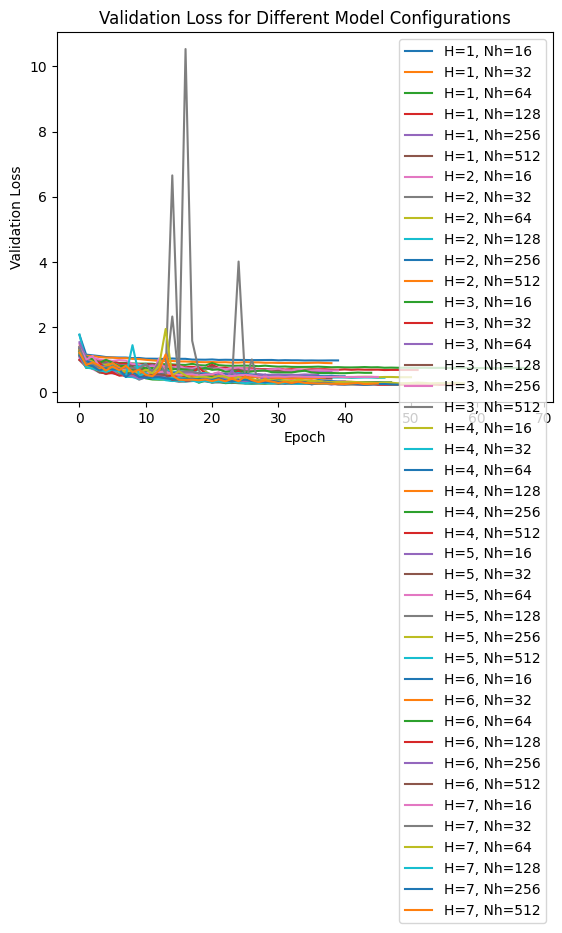

Model with H=1 and Nh=16:
MSE: 1.0377976894378662
MAE: 1.0377975353700324
RMSE: 5.6418429161009795
R-squared: 0.5812174803083071
MAPE: 1206.7070842435085%
Model with H=1 and Nh=32:
MSE: 0.9512962698936462
MAE: 0.9512965798746599
RMSE: 5.592968552186616
R-squared: 0.6260371898517145
MAPE: 661.2895949506111%
Model with H=1 and Nh=64:
MSE: 0.7937303185462952
MAE: 0.7937306358643141
RMSE: 5.497228530172455
R-squared: 0.7298805521092772
MAPE: 702.9496928929065%
Model with H=1 and Nh=128:
MSE: 0.7428430914878845
MAE: 0.7428430431635823
RMSE: 5.4770785611272785
R-squared: 0.7565046919976752
MAPE: 700.4852208737718%
Model with H=1 and Nh=256:
MSE: 0.7106107473373413
MAE: 0.7106108079125096
RMSE: 5.462265521274528
R-squared: 0.7677192207248856
MAPE: 762.0172281874479%
Model with H=1 and Nh=512:
MSE: 0.7157402634620667
MAE: 0.7157403760520135
RMSE: 5.468381432853199
R-squared: 0.7668290819824516
MAPE: 827.6471042046282%
Model with H=2 and Nh=16:
MSE: 0.7234553098678589
MAE: 0.7234552477680674
RM

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_30.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# # Scale input features to range [0, 1]
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the dataset into training, validation, and testing sets
# X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3

# Apply Min-Max normalization separately for each input feature
X_scaled = np.zeros_like(X, dtype=float)  # Initialize scaled data array

# Scale L
X_scaled[:, 0] = (X[:, 0] - L_min) / (L_max - L_min)

# Scale C
X_scaled[:, 1] = (X[:, 1] - C_min) / (C_max - C_min)

# Scale fsw
X_scaled[:, 2] = (X[:, 2] - fsw_min) / (fsw_max - fsw_min)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses = {}
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
# H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
# Nh_values = [32, 64, 128]  # Number of neurons per hidden layer
# Additional values for H and Nh
H_values = [1, 2, 3, 4, 5, 6, 7]  # Number of hidden layers
# Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer
# H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512]  # Number of neurons per hidden layer



# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_absolute_error')

        lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

        # # Train the model and store the training history
        # history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        # Train the model with custom callback to print information at the end of each epoch and early stopping
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),    
                    callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=1)
        
        histories[(H, Nh)] = history
        
        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')


## Ranking

In [3]:
import os
import pandas as pd

# Sort configurations based on MSE in ascending order
sorted_configs_mse = sorted(mses.items(), key=lambda x: x[1])

# Sort configurations based on MAE in ascending order
sorted_configs_mae = sorted(maes.items(), key=lambda x: x[1])

# Sort configurations based on RMSE in ascending order
sorted_configs_rmse = sorted(rmses.items(), key=lambda x: x[1])

# Sort configurations based on R-squared in descending order
sorted_configs_r2 = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Sort configurations based on MAPE in ascending order
sorted_configs_mape = sorted(mapes.items(), key=lambda x: x[1])

# Rank each combination based on its position in the sorted lists
ranking = {}
for i, (config, _) in enumerate(sorted_configs_mse):
    ranking[config] = i + 1

for i, (config, _) in enumerate(sorted_configs_mae):
    # ranking.setdefault(config, 0)
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_rmse):
    # ranking.setdefault(config, 0)
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_r2):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_mape):
    ranking[config] += i + 1

# Sort configurations based on their overall ranking
sorted_ranking = sorted(ranking.items(), key=lambda x: x[1])

# Display the rankings
for rank, (config, _) in enumerate(sorted_ranking, 1):
    print(f'{rank}. Combination {config}: Overall rank {rank}')



# # Create the 'ranking' folder if it doesn't exist
# folder_path = 'ranking'
# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)

# # Create a DataFrame for the rankings
# rankings_df = pd.DataFrame(sorted_ranking, columns=['Combination', 'Overall_Rank'])

# # Define the file path for saving the CSV file
# file_path = os.path.join(folder_path, 'rankings_7.csv')

# # Save the DataFrame to a CSV file
# rankings_df.to_csv(file_path, index=False)

# print(f"Rankings saved to '{file_path}'")


1. Combination (7, 256): Overall rank 1
2. Combination (5, 256): Overall rank 2
3. Combination (4, 512): Overall rank 3
4. Combination (3, 256): Overall rank 4
5. Combination (6, 256): Overall rank 5
6. Combination (6, 128): Overall rank 6
7. Combination (7, 512): Overall rank 7
8. Combination (6, 512): Overall rank 8
9. Combination (4, 128): Overall rank 9
10. Combination (2, 512): Overall rank 10
11. Combination (4, 256): Overall rank 11
12. Combination (3, 512): Overall rank 12
13. Combination (5, 512): Overall rank 13
14. Combination (3, 128): Overall rank 14
15. Combination (7, 64): Overall rank 15
16. Combination (2, 256): Overall rank 16
17. Combination (3, 64): Overall rank 17
18. Combination (4, 64): Overall rank 18
19. Combination (7, 128): Overall rank 19
20. Combination (5, 64): Overall rank 20
21. Combination (2, 128): Overall rank 21
22. Combination (5, 128): Overall rank 22
23. Combination (5, 32): Overall rank 23
24. Combination (3, 32): Overall rank 24
25. Combination 

## Try spesific N and H

In [4]:
# Specify the combination you want to call
H = 7
Nh = 256

# Retrieve the model for the specified combination
selected_model = histories[(H, Nh)].model

# Use the trained model to make predictions on the testing set
predictions = selected_model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

127/127 [==============================] - 0s 823us/step
Predictions:
[[9.8065503e-02 1.9379230e+00 3.1266792e+00 3.1070087e+00 1.5493479e-02
  9.3392313e-01]
 [2.5161378e+00 2.3007963e+01 5.2021902e-02 4.9977858e-02 4.9360591e-04
  1.8853541e-02]
 [5.2074087e-01 9.7542324e+00 3.4731293e+00 3.4720724e+00 3.0186672e-03
  2.2565408e+00]
 [3.4473437e-01 3.3883892e+01 8.3637438e+00 8.4030476e+00 5.0582858e-03
  5.1808867e+00]
 [3.3670667e-01 2.7935392e+01 5.9978909e+00 5.9636526e+00 6.0081785e-03
  3.9974644e+00]]
True Values:
[[8.24785561e-02 1.66608588e+00 3.20658853e+00 3.20658853e+00
  1.78710824e-02 9.70550404e-01]
 [2.91178140e+00 2.29786406e+01 2.41527236e-01 2.41527236e-01
  3.22857138e-04 7.06838663e-02]
 [5.65812618e-01 9.54536162e+00 3.61795960e+00 3.61795960e+00
  3.17092808e-03 2.32065136e+00]
 [2.90574366e-01 3.40931078e+01 8.29842095e+00 8.29842095e+00
  9.66771510e-03 5.39112881e+00]
 [2.20010220e-01 2.78614891e+01 6.05613890e+00 6.05613890e+00
  7.62088483e-03 4.04490585e+

# Machine Learning

Epoch 1/50
175/175 [==============================] - 1s 2ms/step - loss: 1.2312 - val_loss: 1.8220
Epoch 2/50
175/175 [==============================] - 0s 1ms/step - loss: 0.7014 - val_loss: 0.9146
Epoch 3/50
175/175 [==============================] - 0s 1ms/step - loss: 0.5161 - val_loss: 0.4631
Epoch 4/50
175/175 [==============================] - 0s 1ms/step - loss: 0.4439 - val_loss: 0.3551
Epoch 5/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3981 - val_loss: 0.2742
Epoch 6/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3696 - val_loss: 0.2336
Epoch 7/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3615 - val_loss: 0.2677
Epoch 8/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3536 - val_loss: 0.2804
Epoch 9/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3828 - val_loss: 0.2224
Epoch 10/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3367 - val_loss: 0.2040

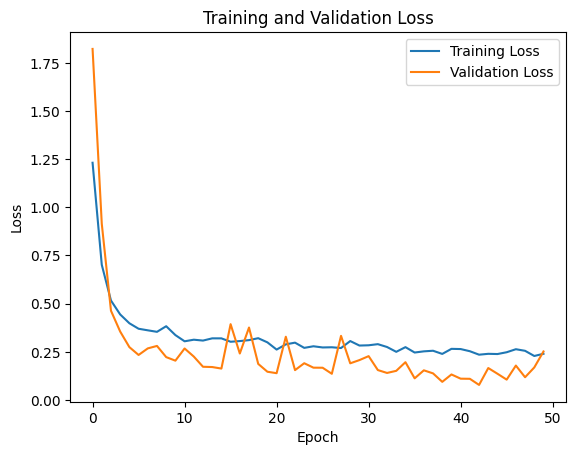

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(128, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(128, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(128, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),         
    tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
])

# model = tf.keras.Sequential([
#     tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 1
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
# ])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with custom callback to print information at the end of each epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[PrintEpochInfo()], verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing Set

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Use the trained model to make predictions on the testing set
predictions = model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

38/38 [==============================] - 0s 606us/step - loss: 0.1632
Mean Squared Error on Testing Set: 0.16320562362670898
38/38 [==============================] - 0s 499us/step
Predictions:
[[0.20654827 6.483947   2.6345077  2.6322153  0.01708872 1.3133281 ]
 [0.12445674 4.282261   3.5189834  3.520649   0.00829306 1.0214925 ]
 [0.14707306 6.546033   3.3875675  3.4100778  0.00850959 1.2893308 ]
 [0.06795892 4.3753366  2.3814638  2.3742485  0.01889426 2.3163981 ]
 [0.06067272 0.20301414 2.079679   2.104424   0.14704187 2.053334  ]]
True Values:
[[0.26001435 4.23264405 2.74299141 2.74299141 0.01217656 1.29224261]
 [0.19503469 3.32206237 3.59940991 3.59940991 0.00902757 0.95760415]
 [0.23933468 4.23420079 3.51435724 3.51435724 0.00733677 1.291914  ]
 [0.08042573 4.24613856 2.40471154 2.40471154 0.02217949 2.34150863]
 [0.07897327 0.58997409 2.02413572 2.02413572 0.16765618 2.15456352]]
Mean Absolute Error (MAE): 0.13914263041641098
Root Mean Squared Error (RMSE): 0.4039871578126952
R-sq

## Save Model

In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Optionally, save the model
model.save("ripples_prediction_model.h5")
